In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\Ramkrushna patra\Downloads\pulsar_data_test.csv")

In [3]:
# view dimensions of dataset
df.shape

(5370, 9)

In [4]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405,NaN
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791,NaN
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941,NaN
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904,NaN
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268,NaN


In [5]:
# We can see that there are 9 variables in the dataset. 8 are continuous variables and 1 is discrete variable. The discrete variable is target_class variable. It is also the target variable.

# Now, I will view the column names to check for leading and trailing spaces# view the column names of the dataframe

col_names = df.columns

col_names




Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [6]:
# We can see that there are leading spaces (spaces at the start of the string name) in the dataframe. So, I will remove these leading spaces.
# remove leading spaces from column names

df.columns = df.columns.str.strip()


In [7]:
# view column names again

df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [8]:
# We can see that the leading spaces are removed from the column name. But the column names are very long. So, I will make them short by renaming them.

# rename column names

df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

In [9]:
df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

In [10]:
# We can see that the column names are shortened. IP stands for integrated profile and DM-SNR stands for delta modulation and signal to noise ratio. Now, it is much more easy to work with the columns.

# Our target variable is the target_class column. So, I will check its distribution.


# check distribution of target_class column

df['target_class'].value_counts()

Series([], Name: count, dtype: int64)

In [13]:
# view the percentage distribution of target_class column
df['target_class'].value_counts() / np.float64(len(df))



Series([], Name: count, dtype: float64)

In [14]:
# We can see that percentage of observations of the class label 0 and 1 is 90.84% and 9.16%. So, this is a class imbalanced problem. I will deal with that in later section.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5370 entries, 0 to 5369
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          5370 non-null   float64
 1   IP Sd            5370 non-null   float64
 2   IP Kurtosis      4603 non-null   float64
 3   IP Skewness      5370 non-null   float64
 4   DM-SNR Mean      5370 non-null   float64
 5   DM-SNR Sd        4846 non-null   float64
 6   DM-SNR Kurtosis  5370 non-null   float64
 7   DM-SNR Skewness  5126 non-null   float64
 8   target_class     0 non-null      float64
dtypes: float64(9)
memory usage: 377.7 KB


In [15]:
# check for missing values in variables

df.isnull().sum()

IP Mean               0
IP Sd                 0
IP Kurtosis         767
IP Skewness           0
DM-SNR Mean           0
DM-SNR Sd           524
DM-SNR Kurtosis       0
DM-SNR Skewness     244
target_class       5370
dtype: int64

In [16]:
# We can see that there are no missing values in the dataset.

# Summary of numerical variables
# There are 9 numerical variables in the dataset.
# 8 are continuous variables and 1 is discrete variable.
# The discrete variable is target_class variable. It is also the target variable.
# There are no missing values in the dataset.



# view summary statistics in numerical variables

round(df.describe(),2)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,5370.00,5370.00,4603.00,5370.00,5370.00,4846.00,5370.00,5126.00,0.0
mean,111.17,46.62,0.48,1.75,12.47,26.43,8.23,102.87,NaN
std,25.61,6.94,1.08,6.07,29.15,19.38,4.44,104.75,NaN
min,6.18,24.79,-1.88,-1.76,0.21,7.37,-2.72,-1.96,NaN
25%,101.04,42.41,0.03,-0.19,1.96,14.56,5.70,33.82,NaN
50%,114.76,47.03,0.23,0.19,2.83,18.55,8.38,81.39,NaN
75%,127.02,51.13,0.48,0.92,5.59,28.68,10.63,136.89,NaN
max,192.62,98.78,7.61,65.39,223.39,109.71,34.54,1191.00,NaN


Text(0, 0.5, 'DM-SNR Skewness')

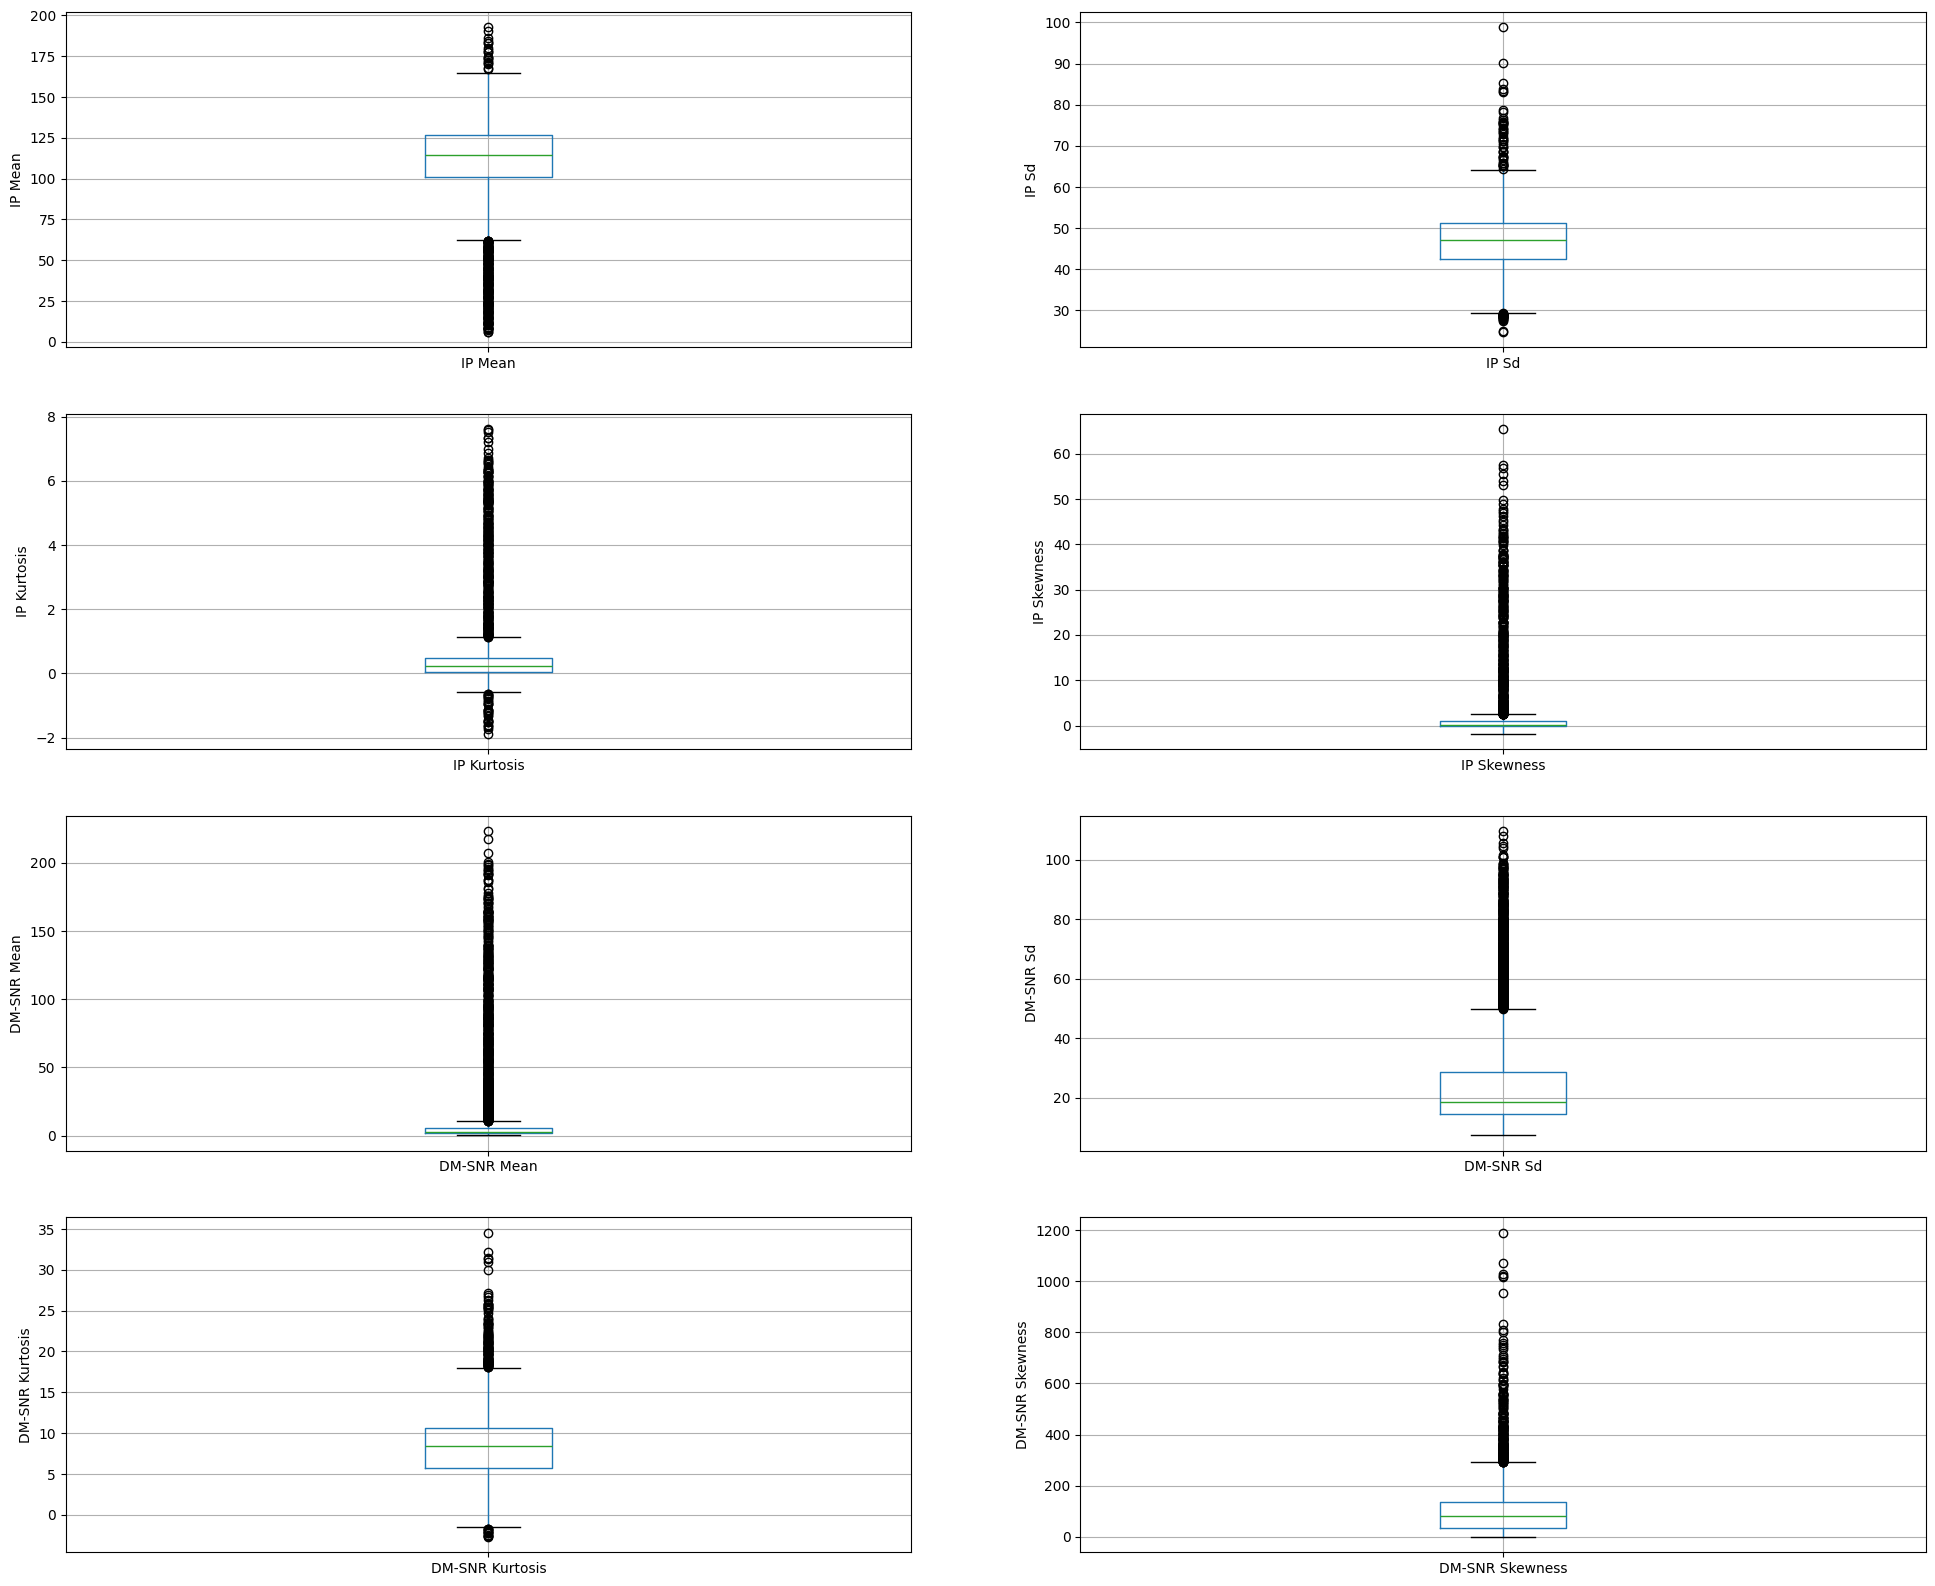

In [17]:
# On closer inspection, we can suspect that all the continuous variables may contain outliers.

# I will draw boxplots to visualise outliers in the above variables.




# draw boxplots to visualize outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='IP Mean')
fig.set_title('')
fig.set_ylabel('IP Mean')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='IP Sd')
fig.set_title('')
fig.set_ylabel('IP Sd')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='IP Kurtosis')
fig.set_title('')
fig.set_ylabel('IP Kurtosis')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='IP Skewness')
fig.set_title('')
fig.set_ylabel('IP Skewness')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='DM-SNR Sd')
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')


plt.subplot(4, 2, 8)
fig = df.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')

Text(0, 0.5, 'Number of pulsar stars')

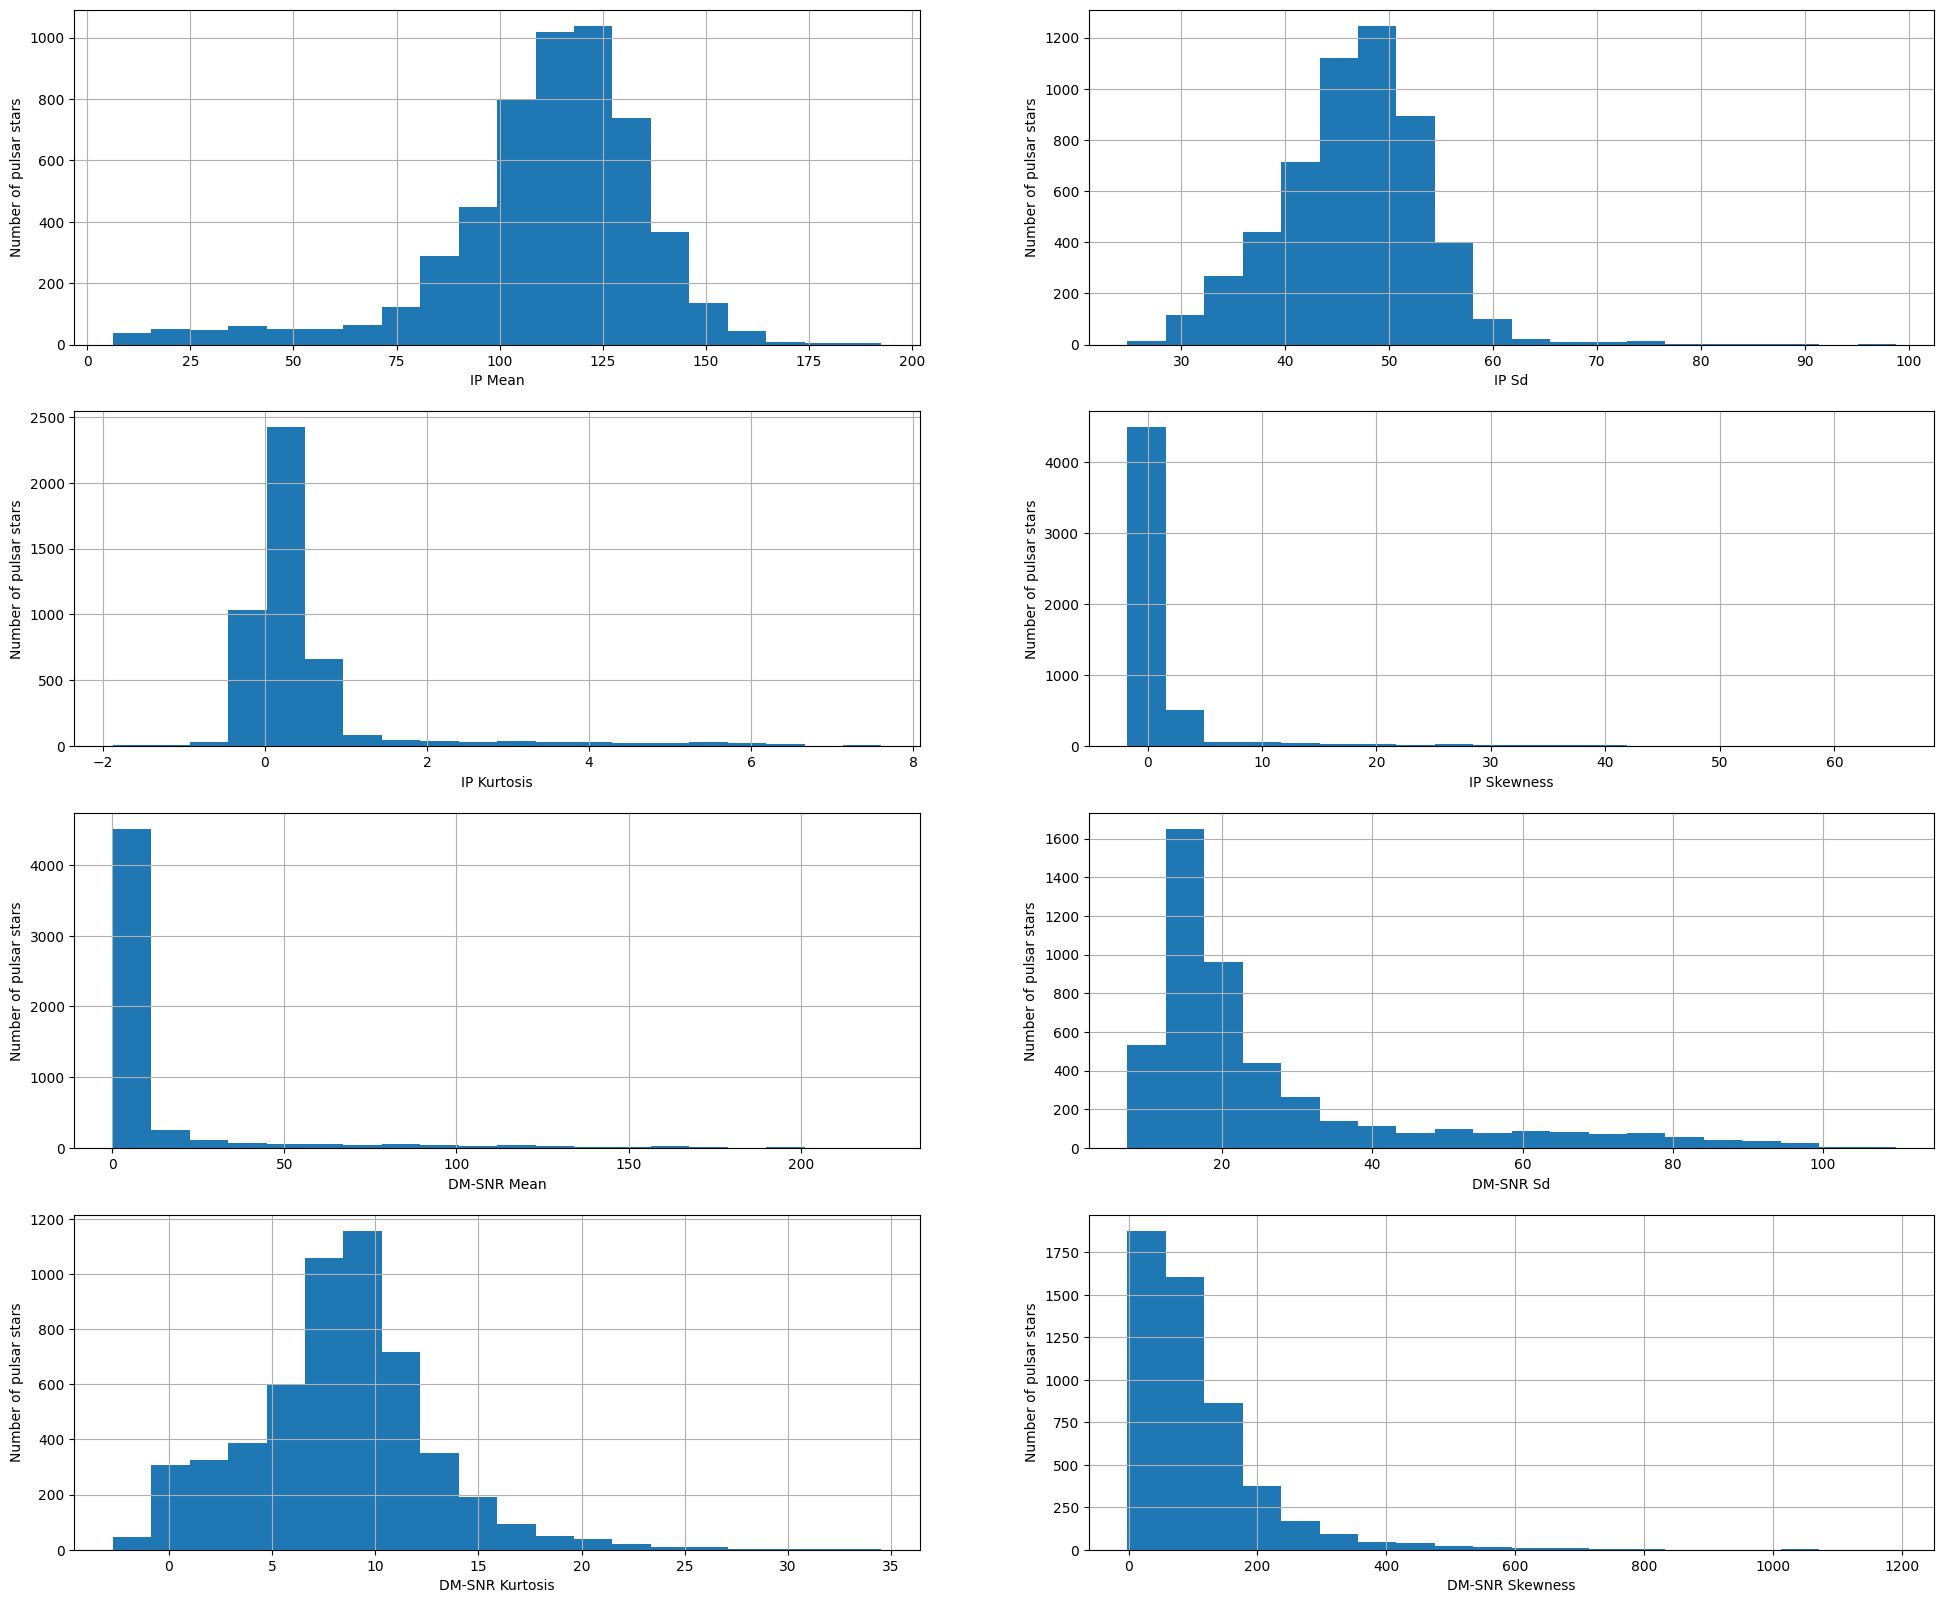

In [18]:
# The above boxplots confirm that there are lot of outliers in these variables.

# Handle outliers with SVMs
# There are 2 variants of SVMs. They are hard-margin variant of SVM and soft-margin variant of SVM.

# The hard-margin variant of SVM does not deal with outliers. In this case, we want to find the hyperplane with maximum margin such that every training point is correctly classified with margin at least 1. This technique does not handle outliers well.

# Another version of SVM is called soft-margin variant of SVM. In this case, we can have a few points incorrectly classified or classified with a margin less than 1. But for every such point, we have to pay a penalty in the form of C parameter, which controls the outliers. Low C implies we are allowing more outliers and high C implies less outliers.

# The message is that since the dataset contains outliers, so the value of C should be high while training the model.




# Check the distribution of variables¶
# Now, I will plot the histograms to check distributions to find out if they are normal or skewed.


# plot histogram to check distribution


plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['IP Mean'].hist(bins=20)
fig.set_xlabel('IP Mean')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 2)
fig = df['IP Sd'].hist(bins=20)
fig.set_xlabel('IP Sd')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 3)
fig = df['IP Kurtosis'].hist(bins=20)
fig.set_xlabel('IP Kurtosis')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 4)
fig = df['IP Skewness'].hist(bins=20)
fig.set_xlabel('IP Skewness')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 5)
fig = df['DM-SNR Mean'].hist(bins=20)
fig.set_xlabel('DM-SNR Mean')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 6)
fig = df['DM-SNR Sd'].hist(bins=20)
fig.set_xlabel('DM-SNR Sd')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 7)
fig = df['DM-SNR Kurtosis'].hist(bins=20)
fig.set_xlabel('DM-SNR Kurtosis')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 8)
fig = df['DM-SNR Skewness'].hist(bins=20)
fig.set_xlabel('DM-SNR Skewness')
fig.set_ylabel('Number of pulsar stars')

In [28]:
X = df.drop(['target_class'], axis=1)

y = df['target_class']

In [39]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [40]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((4296, 8), (1074, 8))

In [41]:
cols = X_train.columns

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [43]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [44]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [45]:
X_train.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,4.296000e+03,4.296000e+03,3.698000e+03,4296.000000,4.296000e+03,3.881000e+03,4.296000e+03,4.096000e+03
mean,-6.367760e-17,-1.240473e-17,-1.152855e-17,0.000000,7.029345e-18,-1.153419e-16,-3.990187e-17,-2.168404e-18
std,1.000116e+00,1.000116e+00,1.000135e+00,1.000116,1.000116e+00,1.000129e+00,1.000116e+00,1.000122e+00
min,-4.063882e+00,-3.101609e+00,-1.970077e+00,-0.573758,-4.213731e-01,-9.865485e-01,-2.477127e+00,-9.963881e-01
25%,-3.900035e-01,-6.090920e-01,-4.216332e-01,-0.320131,-3.609835e-01,-6.128917e-01,-5.726500e-01,-6.578955e-01
50%,1.422653e-01,5.803332e-02,-2.406727e-01,-0.258462,-3.311235e-01,-4.067631e-01,3.915983e-02,-2.032772e-01
75%,6.208688e-01,6.489275e-01,-1.192354e-02,-0.139999,-2.357761e-01,1.206159e-01,5.364269e-01,3.196420e-01
max,3.066191e+00,7.457160e+00,6.503701e+00,9.000856,7.266387e+00,4.308664e+00,5.967007e+00,1.043546e+01


In [46]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [47]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [48]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [49]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [50]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [51]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 


# fit classifier to training set
linear_svc1000.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc1000.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [52]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [53]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

NameError: name 'y_pred_train' is not defined

In [54]:
# Check for overfitting and underfitting¶
# print the scores on training and test set

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))


NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.